### ESMA 4016
### Clasificacion usando Support Vector Machine
#### Edgar Acuna 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Ejemplo1. SVM aplicado a  los datos de las notas en un curso, usando como predictoras E1 y E2

In [2]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")

In [3]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X1)
StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
print y1

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [5]:
print X1

[[ 1.63786386  1.38369921]
 [ 1.63786386  1.15427758]
 [ 1.90561172  1.03956676]
 [ 1.43705297  1.23075145]
 [ 1.23624207  1.15427758]
 [ 0.2321876   0.73367125]
 [ 0.2321876   1.34546227]
 [-0.50411902  1.11604064]
 [ 1.16930511 -0.33696302]
 [-0.97267777  1.15427758]
 [-0.10249723  0.77190819]
 [-1.84285831  0.96309288]
 [-0.63799295 -0.03106751]
 [ 0.29912456  0.77190819]
 [ 0.09831367  1.00132982]
 [ 0.29912456 -1.29288648]
 [-0.16943419  0.12188024]
 [ 0.43299849 -0.26048914]
 [ 0.90155725 -1.48407117]
 [-0.30330812 -0.03106751]
 [-0.50411902 -0.60462159]
 [-0.37024509 -0.48991077]
 [ 0.49993546 -0.68109546]
 [-0.16943419  0.38953881]
 [-1.37429956 -0.56638465]
 [-2.31141707 -0.87228016]
 [-0.30330812 -0.94875403]
 [ 0.2321876  -1.52230811]
 [-0.63799295 -0.98699097]
 [-0.97267777 -1.44583423]
 [ 0.36606153 -1.75172974]
 [-1.44123653 -1.02522791]]


In [6]:
#Haciendo el knn con tres vecinos y calculando el porcentaje de precision
clf = svm.SVC()
clf.fit(X1, y1) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.support_vectors_

array([[-1.37429956, -0.56638465],
       [-2.31141707, -0.87228016],
       [-0.30330812, -0.94875403],
       [ 0.2321876 , -1.52230811],
       [-0.63799295, -0.98699097],
       [-0.97267777, -1.44583423],
       [ 0.36606153, -1.75172974],
       [ 1.63786386,  1.38369921],
       [ 1.90561172,  1.03956676],
       [ 0.2321876 ,  1.34546227],
       [-1.84285831,  0.96309288],
       [-0.63799295, -0.03106751],
       [ 0.29912456, -1.29288648],
       [ 0.90155725, -1.48407117],
       [-0.50411902, -0.60462159],
       [-0.37024509, -0.48991077],
       [ 0.49993546, -0.68109546]])

In [8]:
clf.n_support_

array([ 7, 10])

In [9]:
#Calculando las predicciones
pred=clf.predict(X1)
print(confusion_matrix(y1,pred))

[[ 7  1]
 [ 0 24]]


In [10]:
print(classification_report(y1,pred))

             precision    recall  f1-score   support

          0       1.00      0.88      0.93         8
          1       0.96      1.00      0.98        24

avg / total       0.97      0.97      0.97        32



In [11]:
#Calculando los errores
error=(y1!=pred).sum()
print "Este es el numero de errores=", error

Este es el numero de errores= 1


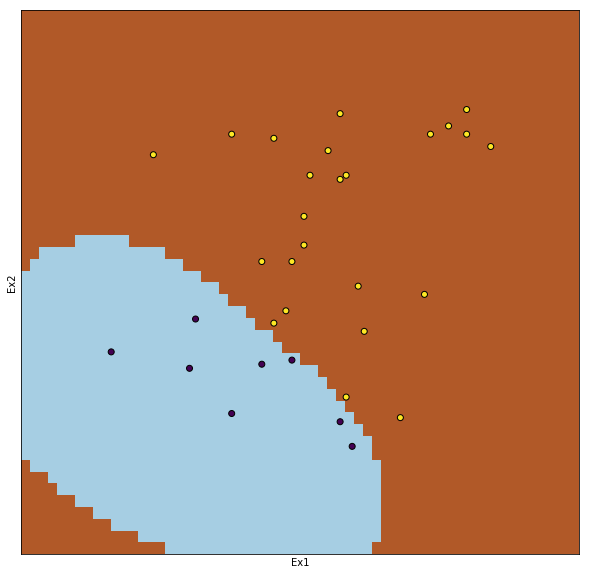

In [12]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
clf = svm.SVC()
clf.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=clf.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### Ejemplo 2. SVM aplicado a Diabetes

In [13]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [14]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
clf=svm.SVC()
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
clf.support_vectors_

array([[ 0.38228883,  0.70813523,  0.50059131, ...,  1.65234741,
        -0.86564017,  1.26130623],
       [ 1.28969968, -0.81111074,  0.19237047, ...,  0.59754639,
         0.05854477,  2.14001013],
       [-1.13006259,  0.51822948,  0.80881216, ..., -0.62447919,
        -0.73719413,  2.31575091],
       ..., 
       [-0.22265174,  0.64483331, -3.50627962, ..., -0.27716666,
         0.92320593, -0.49610158],
       [ 0.9872294 , -0.20974254, -0.11585037, ...,  0.0830093 ,
        -0.65260771,  0.82195428],
       [-0.22265174,  1.1828996 ,  0.08963019, ...,  0.43032183,
        -0.3831843 ,  0.20686154]])

In [17]:
pred=clf.predict(X_test)

In [18]:
clf.score(X_test, y_test)

0.77604166666666663

In [19]:
print (classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.81      0.86      0.83       125
          2       0.70      0.63      0.66        67

avg / total       0.77      0.78      0.77       192



### Ejemplo 3. SVM aplicado a  Landsat 

In [20]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
#Estimacion por el metodo  "holdout 
X_train, X_test, y_train, y_test = train_test_split(X, y)
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [22]:
pred=lin_clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[265   0   0   1   6   0]
 [  0 122   0   0   7   0]
 [  9   0  23  40  17 154]
 [  2   1   3  20  11  71]
 [  1  20   0   2  84  14]
 [  0   3   0   1  12 220]]


In [23]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.96      0.97      0.97       272
          2       0.84      0.95      0.89       129
          3       0.88      0.09      0.17       243
          4       0.31      0.19      0.23       108
          5       0.61      0.69      0.65       121
          6       0.48      0.93      0.63       236

avg / total       0.73      0.66      0.61      1109



### V . SVM aplicado a Shuttle

In [24]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_table(url, header=None,delim_whitespace=True)

In [25]:
y=data.iloc[:,9]
X=data.iloc[:,0:9]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#Estimacion por el metodo  "holdout 
X_train, X_test, y_train, y_test = train_test_split(X, y)
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [27]:
pred=lin_clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[8436    0    4  161    0    0   16]
 [   2    0    0    4    0    0    0]
 [  15    0    0   15    0    0    0]
 [ 484    0    0 1156    0    1    0]
 [   1    0    0  281  297    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0]]


In [28]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.94      0.98      0.96      8617
          2       0.00      0.00      0.00         6
          3       0.00      0.00      0.00        30
          4       0.71      0.70      0.71      1641
          5       1.00      0.51      0.68       579
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         2

avg / total       0.91      0.91      0.90     10875



C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [29]:
clf1 = svm.SVC(decision_function_shape='ovo')
clf1.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
pred=lin_clf.predict(X_test)
print(confusion_matrix(y_test, pred))